# CST hdf5 export example

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

---
### 1D Fields

In [2]:
g = h5py.File('.\\cstdemo\\hd5\\cstdemo\\E-Field (f=0.5) x0=0.005 y0=-0.0017.hdf5', 'r')
list(g.keys())

['Type', 'f', 'x0', 'xGrad', 'y0', 'yGrad', 'z', 'zComp']

In [22]:
print('Type:', g['Type'][0].decode('utf-8'))
print('f in meters:', g['f'][0])
print('x0 in meters:', g['x0'][0])
print('y0 in meters:', g['y0'][0])
print('z in meters:', g['z'][:3])
print('dFz/dx:', g['xGrad'][:3])
print('dFz/dy:', g['yGrad'][:3])
print('Fz:', g['zComp'][:3])

Type: E-Field
f in meters: 500000000.0
x0 in meters: 0.004999999999999991
y0 in meters: -0.0016902511465123997
z in meters: [-0.3        -0.28437434 -0.26874868]
dFz/dx: [ -14.67466354 -1.15303993j  -63.69285583 -4.98139858j
 -275.98409653-21.29368782j]
dFz/dy: [ -84.61495183 -5.25258653j -239.13397912-14.59719713j
 -760.8308351 -45.09120307j]
Fz: [ -2.47009993-0.15470421j  -5.66707134-0.35223031j
 -13.88260555-0.85151815j]


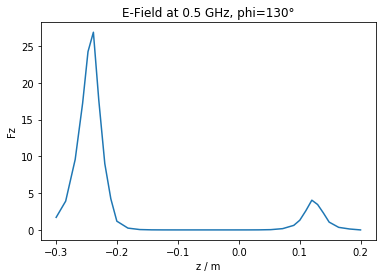

In [13]:
phi = 220
plt.plot(g['z'], np.real(np.exp(1j*np.pi/180*phi)*g['zComp']))
plt.xlabel('z / m')
plt.ylabel('Fz')
plt.title('{:s} at {:n} GHz, phi={:n}°'.format(str(g['Type'][0].decode('utf-8')), g['f'][0]/1e9, phi));

---
### 3D Fields

In [15]:
dim_x = 0
dim_y = 1
dim_z = 2

In [16]:
f = h5py.File('.\\cstdemo\\hd5_3d\\cstdemo\\E-Field (f=0.5).hdf5', 'r')
list(f.keys())

['Type', 'f', 'field3d', 'x', 'y', 'z']

In [30]:
print('Type:', f['Type'][0].decode('utf-8'))
print('f in Hz:', f['f'][0])
print('x in meters:', f['x'][:3])
print('y in meters:', f['y'][:3])
print('z in meters:', f['z'][:3])
print('Fx(x[5], y, z[5]):', f['field3d'][dim_x,5,:3,5])

Type: E-Field
f in Hz: 500000000.0
x in meters: [-0.015 -0.005  0.005]
y in meters: [-0.02       -0.01003538 -0.00169025]
z in meters: [-0.3        -0.28437434 -0.26874868]
Fx(x[5], y, z[5]): [ 0.         +0.j         36.97775269 +6.90055466j
 82.23168945+15.12157822j]


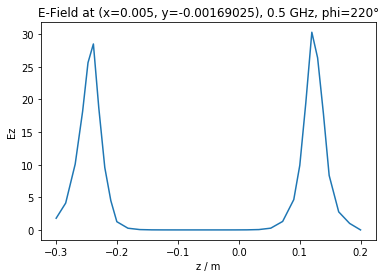

In [80]:
x0 = 0
y0 = 0

ix = np.argmin(np.abs(np.array(f['x'])-x0))
iy = np.argmin(np.abs(np.array(f['y'])-y0))

phi = 220
plt.plot(g['z'], np.real(np.exp(1j*np.pi/180*phi)*f['field3d'][dim_z,ix,iy,:]))
plt.xlabel('z / m')
plt.ylabel('Ez')
plt.title('{:s} at (x={:n}, y={:n}), {:n} GHz, phi={:n}°'.format(str(g['Type'][0].decode('utf-8')), f['x'][ix], f['y'][iy], g['f'][0]/1e9, phi));

Max field in this plane: 411.329 V/m


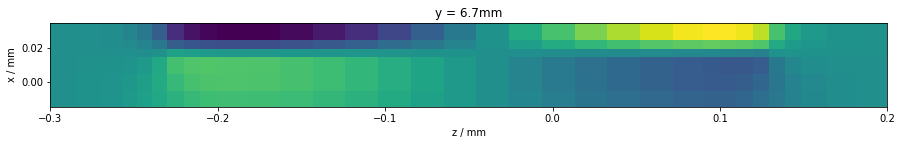

In [79]:
# y = const, x-Komponente
fig = plt.figure(figsize=[15,15])
ax = fig.gca()
ax.set_aspect('equal')

iy = 3
phi = 220
plt.pcolormesh(f['z'],f['x'] , np.real(np.exp(1j*np.pi/180*phi)*f['field3d'][dim_x,:,iy,:]))
plt.title("y = {:.1f}mm".format(1e3*f['y'][iy]));
plt.xlabel('z / mm')
plt.ylabel('x / mm')

print('Max field in this plane: {:.3f} V/m'.format(np.max(np.abs(f['field3d'][dim_x,:,iy,:]))))

Max field in this plane: 176.765 V/m


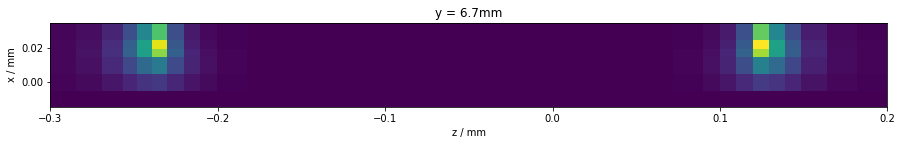

In [78]:
# y = const, z-Komponente
fig = plt.figure(figsize=[15,15])
ax = fig.gca()
ax.set_aspect('equal')

iy = 3
phi = 220
plt.pcolormesh(f['z'],f['x'] , np.real(np.exp(1j*np.pi/180*phi)*f['field3d'][dim_z,:,iy,:]))
plt.title("y = {:.1f}mm".format(1e3*f['y'][iy]));
plt.xlabel('z / mm')
plt.ylabel('x / mm')

print('Max field in this plane: {:.3f} V/m'.format(np.max(np.abs(f['field3d'][dim_z,:,iy,:]))))

In [41]:
print(f"nx={len(f['x'])}, ny={len(f['y'])}, nz={len(f['z'])}")
print(f"Size of x-component of field: {f['field3d'][dim_x,:,:,:].shape}")

nx=7, ny=9, nz=34
Size of x-component of field: (7, 9, 34)


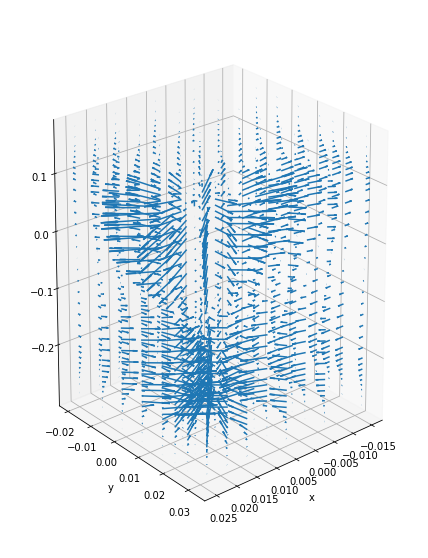

In [77]:
# 3D Arrowplot
ii = 1  # data reduction: take every ii-th point in each dimension

fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')

# Axis
# for some reason, it must be a left-handed system y-x-z?!
y, x, z = np.meshgrid(f['y'][::ii], f['x'][::ii], f['z'][::ii])

# Field
phi = 220  # phase
u = np.real(np.exp(1j*np.pi/180*phi)*f['field3d'][dim_x,::ii,::ii,::ii])
v = np.real(np.exp(1j*np.pi/180*phi)*f['field3d'][dim_y,::ii,::ii,::ii])
w = np.real(np.exp(1j*np.pi/180*phi)*f['field3d'][dim_z,::ii,::ii,::ii])

ax.set_aspect('equal')
ax.view_init(20, 50)

ax.quiver(x, y, z , u, v, w, length=0.00002, normalize=False)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [47]:
u.shape, x.shape, (len(f['x']), len(f['y']), len(f['z']))

((7, 9, 34), (7, 9, 34), (7, 9, 34))

In [76]:
print('ranges:', 'x:', f['x'][0], f['x'][-1], 'y:', f['y'][0], f['y'][-1], 'z:', f['z'][0], f['z'][-1])

ranges: x: -0.015 0.035 y: -0.02 0.04 z: -0.3 0.2


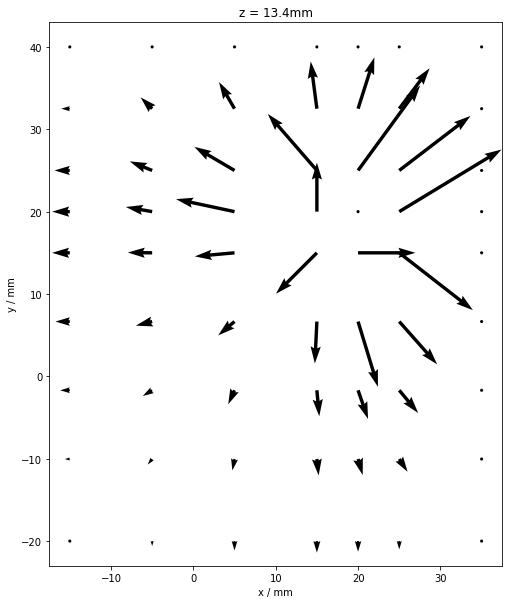

In [69]:
# z = const
fig = plt.figure(figsize=[10,10])
ax = fig.gca()

y, x = np.meshgrid(f['y'], f['x'])

iz = 20
phi = 220
u = np.real(np.exp(1j*np.pi/180*phi)*f['field3d'][dim_x,:,:,iz])
v = np.real(np.exp(1j*np.pi/180*phi)*f['field3d'][dim_y,:,:,iz])

ax.quiver(x*1e3, y*1e3, u, v)
ax.set_aspect('equal')
plt.xlabel('x / mm')
plt.ylabel('y / mm')
plt.title("z = {:.1f}mm".format(1e3*f['z'][iz]));

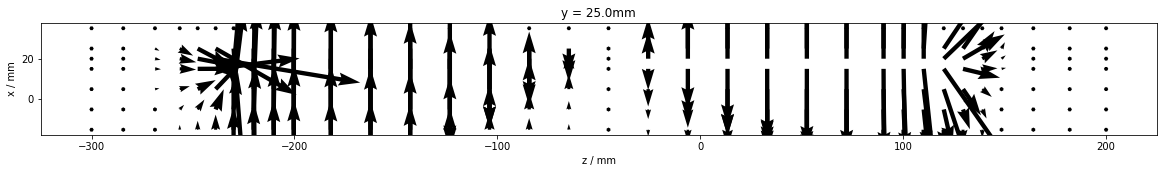

In [66]:
# y = const
fig = plt.figure(figsize=[20,70])
ax = fig.gca()

z, x = np.meshgrid(f['z'], f['x'])

iy = 6
phi = 220
u = np.real(np.exp(1j*np.pi/180*phi)*f['field3d'][dim_x,:,iy,:])
w = np.real(np.exp(1j*np.pi/180*phi)*f['field3d'][dim_z,:,iy,:])

ax.quiver(z*1e3, x*1e3, w, u)
ax.set_aspect('equal')
plt.ylabel('x / mm')
plt.xlabel('z / mm')
plt.title("y = {:.1f}mm".format(1e3*f['y'][iy]));

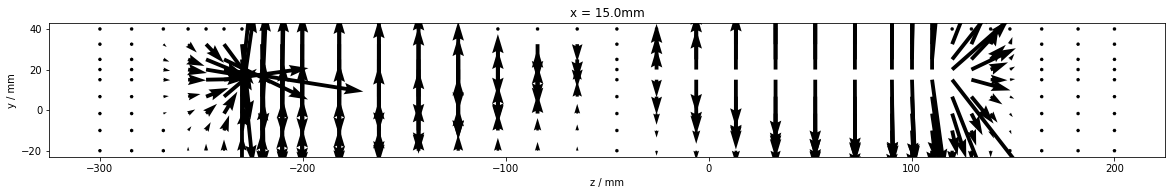

In [73]:
# x = const
fig = plt.figure(figsize=[20,70])
ax = fig.gca()

z, y = np.meshgrid(f['z'], f['y'])

ix = 3
phi = 220
v = np.real(np.exp(1j*np.pi/180*phi)*f['field3d'][dim_y,ix,:,:])
w = np.real(np.exp(1j*np.pi/180*phi)*f['field3d'][dim_z,ix,:,:])

ax.quiver(z*1e3, y*1e3, w, v)
ax.set_aspect('equal')
plt.ylabel('y / mm')
plt.xlabel('z / mm')
plt.title("x = {:.1f}mm".format(1e3*f['x'][ix]));

In [18]:
f.close()
g.close()